In [361]:
import pandas as pd
import numpy as np

df = pd.read_csv(r'C:\Users\Daniel\Documents\Trading\Trading Bot\EURUSD-H1-2Years.csv', delimiter='\t')
print(df.head())

       <DATE>    <TIME>   <OPEN>   <HIGH>    <LOW>  <CLOSE>  <TICKVOL>  <VOL>  \
0  2022.10.03  00:00:00  0.98008  0.98008  0.97833  0.97947        794      0   
1  2022.10.03  01:00:00  0.97950  0.98087  0.97909  0.98008       2901      0   
2  2022.10.03  02:00:00  0.98003  0.98028  0.97893  0.97932       3087      0   
3  2022.10.03  03:00:00  0.97934  0.98040  0.97853  0.98015       4199      0   
4  2022.10.03  04:00:00  0.98015  0.98286  0.98013  0.98255       4331      0   

   <SPREAD>  
0        35  
1         8  
2         8  
3         8  
4         8  


In [362]:
print(df.isnull().sum())

<DATE>       0
<TIME>       0
<OPEN>       0
<HIGH>       0
<LOW>        0
<CLOSE>      0
<TICKVOL>    0
<VOL>        0
<SPREAD>     0
dtype: int64


In [363]:
print(df.dtypes)

<DATE>        object
<TIME>        object
<OPEN>       float64
<HIGH>       float64
<LOW>        float64
<CLOSE>      float64
<TICKVOL>      int64
<VOL>          int64
<SPREAD>       int64
dtype: object


In [364]:
df.columns = ['Date', 'Time', 'Open', 'High', 'Low', 'Close', 'TickVol', 'Vol', 'Spread']
print(df.head())

         Date      Time     Open     High      Low    Close  TickVol  Vol  \
0  2022.10.03  00:00:00  0.98008  0.98008  0.97833  0.97947      794    0   
1  2022.10.03  01:00:00  0.97950  0.98087  0.97909  0.98008     2901    0   
2  2022.10.03  02:00:00  0.98003  0.98028  0.97893  0.97932     3087    0   
3  2022.10.03  03:00:00  0.97934  0.98040  0.97853  0.98015     4199    0   
4  2022.10.03  04:00:00  0.98015  0.98286  0.98013  0.98255     4331    0   

   Spread  
0      35  
1       8  
2       8  
3       8  
4       8  


In [365]:
df['Date'] = pd.to_datetime(df['Date'])

# Ensure 'Time' is in datetime.time format
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M:%S').dt.time

# Extract hour and minute
df['Hour'] = df['Time'].apply(lambda x: x.hour)
df['Minute'] = df['Time'].apply(lambda x: x.minute)

# Cyclical encoding for Hour (0-23)
df['Hour_sin'] = np.sin(2 * np.pi * df['Hour'] / 24)
df['Hour_cos'] = np.cos(2 * np.pi * df['Hour'] / 24)

# Cyclical encoding for Minute (0-59)
df['Minute_sin'] = np.sin(2 * np.pi * df['Minute'] / 60)
df['Minute_cos'] = np.cos(2 * np.pi * df['Minute'] / 60)

# Optionally, drop the original Hour and Minute columns if not needed
df.drop(['Hour', 'Minute'], axis=1, inplace=True)

df = df.drop(['Vol'], axis=1)
df = df.drop(['Time'], axis=1)

print(df.dtypes)
print(df.head())

Date          datetime64[ns]
Open                 float64
High                 float64
Low                  float64
Close                float64
TickVol                int64
Spread                 int64
Hour_sin             float64
Hour_cos             float64
Minute_sin           float64
Minute_cos           float64
dtype: object
        Date     Open     High      Low    Close  TickVol  Spread  Hour_sin  \
0 2022-10-03  0.98008  0.98008  0.97833  0.97947      794      35  0.000000   
1 2022-10-03  0.97950  0.98087  0.97909  0.98008     2901       8  0.258819   
2 2022-10-03  0.98003  0.98028  0.97893  0.97932     3087       8  0.500000   
3 2022-10-03  0.97934  0.98040  0.97853  0.98015     4199       8  0.707107   
4 2022-10-03  0.98015  0.98286  0.98013  0.98255     4331       8  0.866025   

   Hour_cos  Minute_sin  Minute_cos  
0  1.000000         0.0         1.0  
1  0.965926         0.0         1.0  
2  0.866025         0.0         1.0  
3  0.707107         0.0         1.0  
4 

In [366]:
from sklearn.preprocessing import MinMaxScaler
import joblib

# Normalize Data
features_to_scale = ['Open', 'High', 'Low', 'Close', 'TickVol', 'Spread']
scaler = MinMaxScaler()
df[features_to_scale] = scaler.fit_transform(df[features_to_scale])

# Save the scaler for future use (e.g., during inference or further training)
joblib.dump(scaler, 'scaler.pkl')

# Dropping Minute_sin and Minute_cos, offer no vlue as timeframe is hourly
df = df.drop(['Minute_sin', 'Minute_cos'], axis=1)

print(df.head())
print(df.dtypes)

        Date      Open      High       Low     Close   TickVol    Spread  \
0 2022-10-03  0.083391  0.072686  0.093599  0.079431  0.028831  0.191257   
1 2022-10-03  0.079741  0.077653  0.098295  0.083270  0.110372  0.043716   
2 2022-10-03  0.083076  0.073944  0.097306  0.078487  0.117570  0.043716   
3 2022-10-03  0.078734  0.074698  0.094835  0.083711  0.160604  0.043716   
4 2022-10-03  0.083832  0.090166  0.104720  0.098817  0.165712  0.043716   

   Hour_sin  Hour_cos  
0  0.000000  1.000000  
1  0.258819  0.965926  
2  0.500000  0.866025  
3  0.707107  0.707107  
4  0.866025  0.500000  
Date        datetime64[ns]
Open               float64
High               float64
Low                float64
Close              float64
TickVol            float64
Spread             float64
Hour_sin           float64
Hour_cos           float64
dtype: object


In [367]:
import ta

# Adding Technical Indicators

# 1. Simple Moving Averages
df['SMA_10'] = ta.trend.SMAIndicator(close=df['Close'], window=10).sma_indicator()
df['SMA_50'] = ta.trend.SMAIndicator(close=df['Close'], window=50).sma_indicator()

# 2. Exponential Moving Averages
df['EMA_12'] = ta.trend.EMAIndicator(close=df['Close'], window=12).ema_indicator()
df['EMA_26'] = ta.trend.EMAIndicator(close=df['Close'], window=26).ema_indicator()

# 3. Relative Strength Index
df['RSI'] = ta.momentum.RSIIndicator(close=df['Close'], window=14).rsi()

# 4. MACD
macd = ta.trend.MACD(close=df['Close'], window_slow=26, window_fast=12, window_sign=9)
df['MACD'] = macd.macd()
df['MACD_Signal'] = macd.macd_signal()
df['MACD_Diff'] = macd.macd_diff()

# 5. Bollinger Bands
bollinger = ta.volatility.BollingerBands(close=df['Close'], window=20, window_dev=2)
df['Bollinger_High'] = bollinger.bollinger_hband()
df['Bollinger_Low'] = bollinger.bollinger_lband()
df['Bollinger_Middle'] = bollinger.bollinger_mavg()

# 6. Average True Range
df['ATR'] = ta.volatility.AverageTrueRange(high=df['High'], low=df['Low'], close=df['Close'], window=14).average_true_range()

# 8. On-Balance Volume
df['OBV'] = ta.volume.OnBalanceVolumeIndicator(close=df['Close'], volume=df['TickVol']).on_balance_volume()

# 9. Ichimoku Cloud
ichimoku = ta.trend.IchimokuIndicator(high=df['High'], low=df['Low'], window1=9, window2=26, window3=52)
df['Ichimoku_A'] = ichimoku.ichimoku_a()
df['Ichimoku_B'] = ichimoku.ichimoku_b()

# 10. Commodity Channel Index
df['CCI'] = ta.trend.CCIIndicator(high=df['High'], low=df['Low'], close=df['Close'], window=20).cci()

# 11. Volume-Weighted Average Price
df['VWAP'] = ta.volume.VolumeWeightedAveragePrice(high=df['High'], low=df['Low'], close=df['Close'], volume=df['TickVol']).volume_weighted_average_price()

# Handle NaN values created by rolling calculations with forward fill
df = df.ffill()

# drop NaN rows
df = df.dropna().reset_index(drop=True)

print(f"Number of rows after dropping NaNs: {len(df)}")
print(df[['SMA_10', 'SMA_50', 'RSI', 'MACD', 'MACD_Signal', 'MACD_Diff', 'Bollinger_High', 'Bollinger_Low', 'Bollinger_Middle', 'ATR', 'OBV', 'Ichimoku_A', 'Ichimoku_B', 'CCI', 'VWAP']].head(20))

Number of rows after dropping NaNs: 12408
      SMA_10    SMA_50        RSI      MACD  MACD_Signal  MACD_Diff  \
0   0.192630  0.115744  75.326803  0.027004     0.024836   0.002168   
1   0.196085  0.118123  75.471595  0.026217     0.025113   0.001105   
2   0.197306  0.120330  71.197047  0.024920     0.025074  -0.000154   
3   0.196626  0.122497  65.566583  0.023083     0.024676  -0.001593   
4   0.196456  0.124586  66.106136  0.021481     0.024037  -0.002556   
5   0.196154  0.126397  66.668597  0.020081     0.023246  -0.003164   
6   0.194159  0.128333  64.759007  0.018590     0.022315  -0.003724   
7   0.192497  0.130326  63.396058  0.017095     0.021271  -0.004176   
8   0.191906  0.132743  67.693936  0.016406     0.020298  -0.003892   
9   0.189300  0.134191  50.341778  0.013832     0.019004  -0.005173   
10  0.187059  0.136074  52.751873  0.011999     0.017603  -0.005605   
11  0.183698  0.137563  46.655513  0.009572     0.015997  -0.006425   
12  0.180425  0.138987  44.629768  

In [368]:
# Normalizing Technical Indicator Data

features_to_scale_ti = [
    'SMA_10', 'SMA_50', 'RSI', 'MACD', 'MACD_Signal', 'MACD_Diff',
    'Bollinger_High', 'Bollinger_Low', 'Bollinger_Middle', 'ATR',
    'OBV', 'Ichimoku_A', 'Ichimoku_B', 'CCI', 'VWAP'
]

df[features_to_scale_ti] = scaler.fit_transform(df[features_to_scale_ti])

print(df[features_to_scale_ti].head())
print(df[features_to_scale_ti].describe())

     SMA_10    SMA_50       RSI      MACD  MACD_Signal  MACD_Diff  \
0  0.180051  0.095666  0.800629  0.859451     0.834764   0.578794   
1  0.183578  0.098134  0.802416  0.847708     0.839465   0.542006   
2  0.184824  0.100423  0.749667  0.828354     0.838810   0.498458   
3  0.184130  0.102672  0.680185  0.800936     0.832032   0.448657   
4  0.183957  0.104839  0.686843  0.777027     0.821155   0.415328   

   Bollinger_High  Bollinger_Low  Bollinger_Middle       ATR       OBV  \
0        0.206737       0.100535          0.145042  0.540270  0.146352   
1        0.208959       0.107304          0.149613  0.550071  0.150085   
2        0.208332       0.116968          0.154233  0.529768  0.144391   
3        0.206308       0.126650          0.158161  0.518690  0.133805   
4        0.205550       0.133524          0.161290  0.526755  0.142205   

   Ichimoku_A  Ichimoku_B       CCI      VWAP  
0    0.155057    0.112939  0.595465  0.154325  
1    0.159122    0.112939  0.589008  0.15903

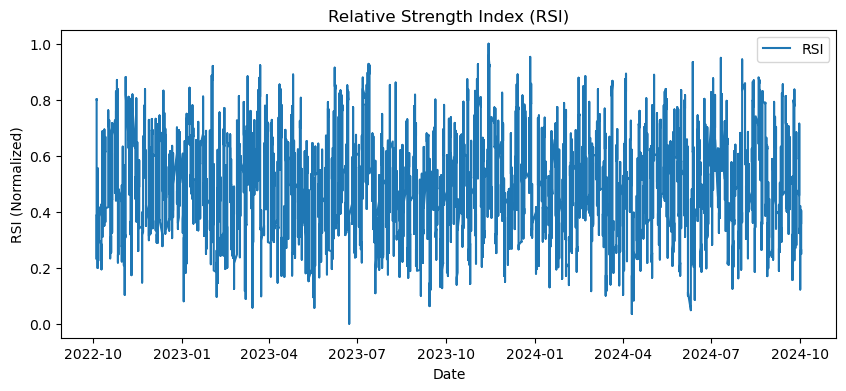

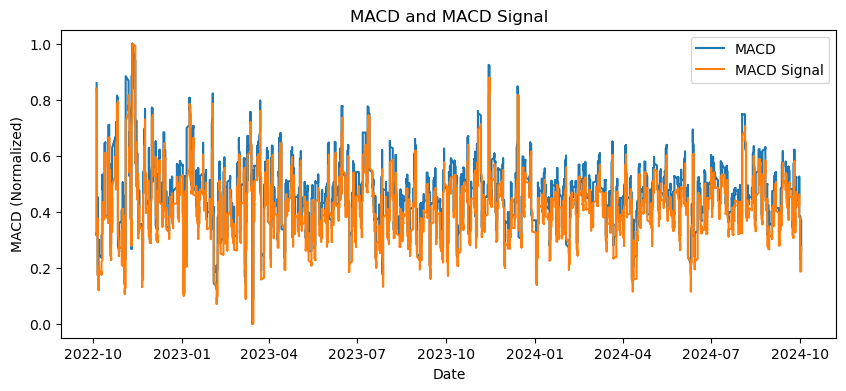

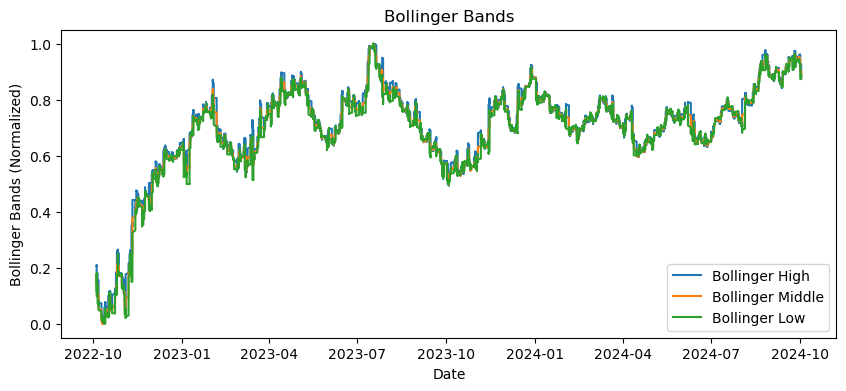

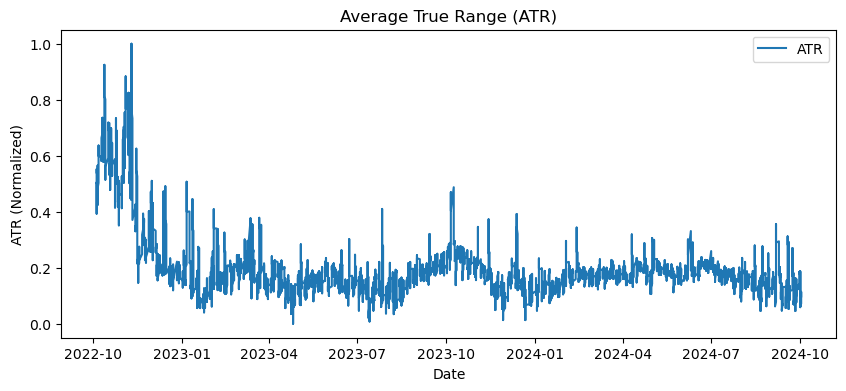

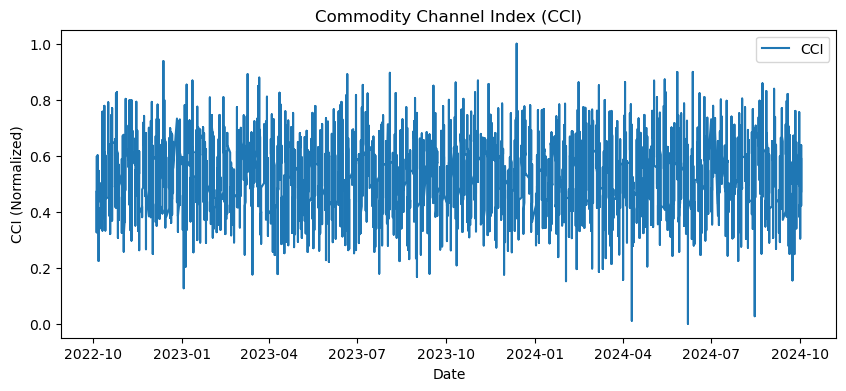

In [369]:
import matplotlib.pyplot as plt

# Visual Inspection

# Plot RSI
plt.figure(figsize=(10, 4))
plt.plot(df['Date'], df['RSI'], label='RSI')
plt.title('Relative Strength Index (RSI)')
plt.xlabel('Date')
plt.ylabel('RSI (Normalized)')
plt.legend()
plt.show()

# Plot MACD and MACD Signal
plt.figure(figsize=(10, 4))
plt.plot(df['Date'], df['MACD'], label='MACD')
plt.plot(df['Date'], df['MACD_Signal'], label='MACD Signal')
plt.title('MACD and MACD Signal')
plt.xlabel('Date')
plt.ylabel('MACD (Normalized)')
plt.legend()
plt.show()

# Plot Bollinger Bands
plt.figure(figsize=(10, 4))
plt.plot(df['Date'], df['Bollinger_High'], label='Bollinger High')
plt.plot(df['Date'], df['Bollinger_Middle'], label='Bollinger Middle')
plt.plot(df['Date'], df['Bollinger_Low'], label='Bollinger Low')
plt.title('Bollinger Bands')
plt.xlabel('Date')
plt.ylabel('Bollinger Bands (Normalized)')
plt.legend()
plt.show()

# Plot ATR
plt.figure(figsize=(10, 4))
plt.plot(df['Date'], df['ATR'], label='ATR')
plt.title('Average True Range (ATR)')
plt.xlabel('Date')
plt.ylabel('ATR (Normalized)')
plt.legend()
plt.show()

# Plot CCI
plt.figure(figsize=(10, 4))
plt.plot(df['Date'], df['CCI'], label='CCI')
plt.title('Commodity Channel Index (CCI)')
plt.xlabel('Date')
plt.ylabel('CCI (Normalized)')
plt.legend()
plt.show()